# Library

In [ ]:
# 시각화 패키지
!pip install graphviz

In [128]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import graphviz

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Tree

## Decision Tree

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_002.png" width="600" height="400"/>

데이터의 특성을 기반으로 의사 결정을 시각적으로 표현하는 트리 구조의 알고리즘 <br>
-> 데이터의 특징을 가지치기를 통해 분류 또는 회귀 <br>
노드가 나무 가지처럼 연결된 **비선형** 계층적 자료구조 <br>  
트리 내 다른 하위 트리가 있고 그 하위 트리에는 또 다른 하위 트리가 존재하는 **재귀적 구조** <br>

### 용어

<img src="https://velog.velcdn.com/images/kwontae1313/post/017e5691-6908-4684-ab5c-85dee4638720/image.png" width="600" height="300"/>

- 노드(Node): 트리를 구성하는 기본 요소
- 간선(Edge): 노드 간 연결선
- 루트 노드(Root Node): 부모가 없는 최상위 노드
- 부모 노드(Parent Node): 자식 노드를 가진 노드
- 자식 노드(Child Node): 부모 노드의 하위 노드
- 형제 노드(Siblingg Node): 같은 부모를 가지는 노드
- 리프 노드(Leaf Node): 자식 노드가 없는 노드
- 깊이(Depth): 루트 노드에서 특정 노드까지의 간선 수
- 높이(Height): 어떤 로드에서 리프 노드까지 가장 긴 경로의 간선 수
- 경로(Path): 한 노드에서 다른 노드로 가는 길 사이의 순서

### 학습 방법

#### Entropy

classification에서 사용. <br>
무질서를 나타내는 정도로 entropy 값이 높으면 무질서 정도가 높고 값이 낮으면 무질서 정도가 낮음. <br>
엔트로피가 최소화 되는 방향으로 모델 학습. <br>

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*zMu0UClotNXljrjqmyRIHA.png" width="600" height="400"/>


#### regression

클래스를 잘 분류할 수 있는 조건(선)을 그어가며 학습 <br>
회귀의 경우도 특정 조건 하에서 어떤 값이 나올 수 있도록 학습 <br>

<img src="https://tensorflow.blog/wp-content/uploads/2017/06/2-24.png" width="600" height="300"/>

<img src="https://tensorflow.blog/wp-content/uploads/2017/06/2-25.png" width="600" height="300"/>

<img src="https://tensorflow.blog/wp-content/uploads/2017/06/2-26.png" width="600" height="300"/>

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png" width="600" height="300"/>

### 장단점

<font style="font-size:20px"> 장점 </font>
- 직관적이고 해석이 쉬움: 데이터의 분할 과정을 쉽게 추적하고 설명 가능
- 비선형 데이터 처리: 데이터가 복잡한 비선형 관계를 가지더라도 적절한 특성 분할을 통해 모델링이 가능
- 특성 스케일링 필요 없음
- 다양한 데이터 유형 지원: 연속형 데이터와 범주형 데이터 모두 지원
- 자동 특성 선택: 중요한 특성을 자동으로 선택하고, 덜 중요한 특성은 제외

<br>

<font style="font-size:20px"> 단점 </font>
- 과적합(Overfitting): 훈련 데이터에 지나치게 적합되어 새로운 데이터에 대한 일반화 성능이 떨어질 수 있음
- 불안정성: 결정 트리는 데이터의 작은 변화에 민감할 수 있습니다. 작은 데이터 변경이 트리 구조를 크게 변경할 수 있습니다. 이를 개선하기 위해 앙상블 기법(예: 랜덤 포레스트, 부스팅 등)을 사용할 수 있습니다.
- 비선형 데이터의 복잡한 분할: 데이터가 매우 복잡하거나 특성이 많을 경우, 너무 많은 분할을 생성하여 모델 해석이 어려워질 수 있음
- 매끄럽지 않은 결정 경계: 결정 트리는 직선적인 경계로 데이터를 분할하므로, 결정 경계가 부드럽지 않을 수 있음. 이로 인해 경계가 데이터의 실제 분포를 잘 반영하지 못할 가능성 존재.

### 사용 방법

> ```python
> from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
> 
> decision_tree = DecisionTreeRegressor(
>   n_estimators=100,
> )
> decision_tree = DecisionTreeClassifier(
>   n_estimators=100,
> )
> 
> decision_tree.fit(X, y)    # train
> decision_tree.predict(X)   # predict
> 
> ```

주요 파라미터
- max_depth: 각 tree의 최대 깊이
- min_sample_split: 분기에 필요한 최소 데이터 수
- max_features: 분기 시 고려할 최대 feature 수
- random_state: 난수 고정을 위한 seed

In [12]:
species_to_idx = dict(zip(penguin.species.unique(), range(penguin.species.nunique())))
sex_to_idx = dict(zip(penguin.sex.unique(), range(penguin.sex.nunique())))

In [13]:
penguin.species = penguin.species.apply(lambda x: species_to_idx.get(x))
penguin.sex = penguin.sex.apply(lambda x: sex_to_idx.get(x))
penguin

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,0
1,0,39.5,17.4,186.0,3800.0,1
2,0,40.3,18.0,195.0,3250.0,1
3,0,36.7,19.3,193.0,3450.0,1
4,0,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...
328,2,47.2,13.7,214.0,4925.0,1
329,2,46.8,14.3,215.0,4850.0,1
330,2,50.4,15.7,222.0,5750.0,0
331,2,45.2,14.8,212.0,5200.0,1


In [14]:
train, test = train_test_split(penguin, test_size=0.3, random_state=0)

In [15]:
tree = DecisionTreeClassifier()
tree.fit(train.drop(columns=['species']), train.species)

DecisionTreeClassifier()

In [16]:
print(f'train_acc: {(tree.predict(train.drop(columns=['species'])) == train.species).mean()}')
print(f'test_acc: {(tree.predict(test.drop(columns=['species'])) == test.species).mean()}')

train_acc: 1.0
test_acc: 0.96


[Text(0.578125, 0.9285714285714286, 'flipper_length_mm <= 207.5\ngini = 0.646\nsamples = 233\nvalue = [98, 52, 83]'),
 Text(0.34375, 0.7857142857142857, 'bill_length_mm <= 44.65\ngini = 0.452\nsamples = 145\nvalue = [96, 48, 1]'),
 Text(0.125, 0.6428571428571429, 'bill_length_mm <= 42.35\ngini = 0.041\nsamples = 95\nvalue = [93, 2, 0]'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 87\nvalue = [87, 0, 0]'),
 Text(0.1875, 0.5, 'bill_depth_mm <= 17.45\ngini = 0.375\nsamples = 8\nvalue = [6, 2, 0]'),
 Text(0.125, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.5625, 0.6428571428571429, 'body_mass_g <= 4550.0\ngini = 0.15\nsamples = 50\nvalue = [3, 46, 1]'),
 Text(0.4375, 0.5, 'bill_depth_mm <= 21.15\ngini = 0.08\nsamples = 48\nvalue = [2, 46, 0]'),
 Text(0.375, 0.35714285714285715, 'bill_length_mm <= 45.9\ngini = 0.042\nsamples = 47\nvalue = [1, 46, 0]'),
 Text(0.3125, 0.21428571428571

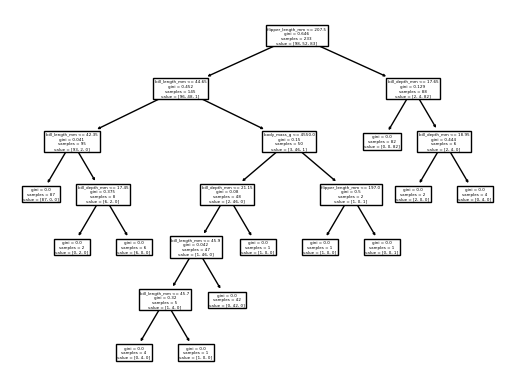

In [17]:
plot_tree(
    tree,
    feature_names=train.drop(columns=['species']).columns,
)

In [34]:
idx_to_species = {value: key for key, value in species_to_idx.items()}
idx_to_species

{0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}

In [35]:
tree_graphviz = export_graphviz(    
    tree,
    feature_names=train.drop(columns=['species']).columns,
    class_names=[idx_to_species.get(species) for species in train.species.unique()]
)

In [36]:
graph = graphviz.Source(tree_graphviz)
graph.render('decision_tree')
graph.view()

'decision_tree.pdf'

In [46]:
tree = DecisionTreeClassifier(min_samples_split=10)
tree.fit(train.drop(columns=['species']), train.species)

print(f'train_acc: {(tree.predict(train.drop(columns=['species'])) == train.species).mean()}')
print(f'test_acc: {(tree.predict(test.drop(columns=['species'])) == test.species).mean()}')

train_acc: 0.9742489270386266
test_acc: 0.95


In [47]:
tree_graphviz = export_graphviz(    
    tree,
    feature_names=train.drop(columns=['species']).columns,
    class_names=[idx_to_species.get(species) for species in train.species.unique()]
)

graph = graphviz.Source(tree_graphviz)
graph.render('decision_tree')
graph.view()

'decision_tree.pdf'

In [78]:
# carat < 0.3인 데이터 선택
# target: cut
# color, clarity, ... z
diamonds = sns.load_dataset('diamonds')
# cut을 맞출 수 있는 tree 모델

# 1. carat < 0.3인 데이터 선택
diamonds = diamonds.query('carat < 0.3')

# 2. cut과 color, clarity 정수 변환
cut_to_idx = dict(zip(diamonds.cut.unique(), range(diamonds.cut.nunique())))
color_to_idx = dict(zip(diamonds.color.unique(), range(diamonds.color.nunique())))
clarity_to_idx = dict(zip(diamonds.clarity.unique(), range(diamonds.clarity.nunique())))
clarity_to_idx['I1'] = 7
diamonds.cut = diamonds.cut.apply(lambda x: cut_to_idx.get(x))
diamonds.color = diamonds.color.apply(lambda x: color_to_idx.get(x))
diamonds.clarity = diamonds.clarity.apply(lambda x: clarity_to_idx.get(x))

# 3. train, test split (random_state=0)
train, test = train_test_split(diamonds, test_size=0.3, random_state=0)

# 4. tree 모델 적합
tree = DecisionTreeClassifier(random_state=0)
tree.fit(train.drop(columns=['cut']), train['cut'])

# 5. train, test 성능 확인
print(f'train_acc: {(tree.predict(train.drop(columns=['cut'])) == train.cut).mean()}')
print(f'test_acc: {(tree.predict(test.drop(columns=['cut'])) == test.cut).mean()}')

train_acc: 1.0
test_acc: 0.7666666666666667


In [83]:
# hyperparameter tuning
# 1. tree 객체 정의
tree = DecisionTreeClassifier(random_state=0)

# 2. 탐색할 변수를 parameters dictionary로 저장
parameters = {
    'max_depth': range(2, 10),
    'min_samples_split': range(5, 20),
}

# 3. random search 객체 정의
random_search = RandomizedSearchCV(tree, parameters)

# 4. random search 실행
random_search.fit(train.drop(columns='cut'), train.cut)

# 5. 최적의 hyperparameter 조합 추출
index_for_best_performance = \
    random_search.cv_results_.get('params')\
        [random_search.cv_results_.get('rank_test_score').argmin()]

# 6. 해당 hyperparmater로 tree 모델 재학습
max_depth = random_search.cv_results_.get('params')[0].get('max_dpeth')
min_samples_split = random_search.cv_results_.get('params')[0].get('min_samples_split')
tree = DecisionTreeClassifier(
    random_state=0,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
).fit(train.drop(columns='cut'), train.cut)

# 7. 모델 성능 재확인
print(f'train_acc: {(tree.predict(train.drop(columns=['cut'])) == train.cut).mean()}')
print(f'test_acc: {(tree.predict(test.drop(columns=['cut'])) == test.cut).mean()}')

train_acc: 0.8650580875781948
test_acc: 0.7229166666666667


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [80]:
idx_to_cut = {value: key for key, value in cut_to_idx.items()}
tree_graphviz = export_graphviz(    
    tree,
    feature_names=train.drop(columns=['cut']).columns,
    class_names=[idx_to_cut.get(cut) for cut in train.cut.unique()]
)

graph = graphviz.Source(tree_graphviz)
graph.render('decision_tree')
graph.view()

'decision_tree.pdf'

## Ensemble

<img src="https://cdn.prod.website-files.com/5d7b77b063a9066d83e1209c/61f7bbd4e90cce440b88ea32_ensemble-learning.png" width="600" height="300"/>

<br>

두 개 이상의 모델을 결합하여 task를 수행하는 기법 <br> 
오차의 분산을 줄이기에 개별 모델보다 강건함(robust) <br>
    -> 한 모델에서 포착하지 못했던 정보를 다른 모델에서 포착할 수 있음 <br>
따라서 모델 간 다양성이 클수록 ensemble 모델의 효과가 커짐 <br>

### Bagging

<img src="https://cdn.prod.website-files.com/5d7b77b063a9066d83e1209c/61a4414d28946a3ac3e69ed9_q-FrlRMLk-5nSxZ_3ONlFpu5hQ61PsuAxkusTD1vEX5NqkdH2Ie0u_75rIySTZKXVI4VBxM-AIw3APQvRboG3kv-3l3cA5c5qyMwwTMe2OLXzoAgA051Dqbx7XVfdJaDyNwrSLUf.png" width="600" height="300"/>

<br>

Boostrap AGGregatING의 약자로 부트스트랩을 통한 방법 <br>
전체 집합에서 일부 데이터를 선택하여 subset을 만든 후(복원추출) 개별 모델을 학습 <br>
-> subset을 여러 개 만들어 동시에 학습할 수 있기에 병렬화 가능
최종 예측은 평균 등의 방법으로 산출 <br>
이 때 사용되는 모델은 **모두 동일한 모델**이어야 함

<br>

<font style="font-size:20px"> 대표 알고리즘 </font> <p>
- Random Forest

<br>

<font style="font-size:20px"> 사용 방법 </font> <p>

> ```python
> from sklearn.ensemble import BaggingRegressor
> 
> bagging_regressor = BaggingRegressor(
>   estimator=model,
> )
> 
> bagging_regressor.fit(X, y)    # train
> bagging_regressor.predict(X)   # predict
> ```

<br>

주요 파라미터
- estimator: base model
- n_estimators: base learner의 수
- random_state: 난수 고정을 위한 seed

In [96]:
bagging_classifier = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=10),
).fit(train.drop(columns=['cut']), train['cut'])

In [97]:
print(f'train_acc: {(bagging_classifier.predict(train.drop(columns=['cut'])) == train.cut).mean()}')
print(f'test_acc: {(bagging_classifier.predict(test.drop(columns=['cut'])) == test.cut).mean()}')

train_acc: 0.773011617515639
test_acc: 0.73125


#### Random Forest

<img src="https://blog.kakaocdn.net/dn/s8SNC/btrn82AaWBS/jSX1Yf8l9kANu6gu4HXv5K/img.gif" width="600" height="300"/>

<br>

Decision Tree를 기본 모델로 사용하는 Bagging 방법. <br>
각 트리는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 과대적합하는 경향을 가지는데, 이러한 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다는 아이디어에 기반. <br>
데이터 포인트를 무작위로 선택하는 방법과 분할 테스트에서 특성을 무작위로 선택하는 방법 등으로 개별 트리 구성.

##### 장단점

<font style="font-size:20px"> 장점 </font>
- 과적합 방지: 여러 개의 결정 트리를 앙상블하여 예측을 수행하므로, 개별 트리의 과적합 문제를 줄이고 더 일반화된 모델을 생성
- 정확도: 트리의 서로 다른 부분집합을 학습하여 더 정확한 예측
- 노이즈와 이상치 처리: 개별 트리가 이상치에 민감하더라도 앙상블된 모델은 이러한 영향을 줄일 수 있음
- 특성 중요도 평가: 각 특성이 모델의 예측에 기여하는 정도를 평가 가능
- 비선형 데이터 처리: 랜덤 포레스트는 데이터 간의 비선형 관계를 잘 모델링
- 부트스트랩 샘플링: 각 트리는 훈련 데이터의 무작위 샘플을 사용하여 학습하므로, 데이터의 전체를 효과적으로 활용

<font style="font-size:20px"> 단점 </font>
- 해석의 어려움: 개별 트리의 예측을 해석하기 어려울 수 있으며, 이로 전체 모델의 예측을 설명하는 것도 복잡할 수 있음
- 메모리 및 계산 비용: 많은 트리를 생성하고 앙상블을 유지하기 때문에 메모리와 계산 자원이 많이 소모될 수 있음
- 예측 시간: 각 트리를 모두 통과해야 하므로 실시간 예측에는 다소 비효율적일 수 있음
- 과적합: 매우 큰 데이터셋이나 트리가 매우 깊은 경우, 과적합의 위험이 여전히 존재
- 하이퍼파라미터에 의한 영향: 기본적으로 잘 동작하나, 최적의 성능을 위해 하이퍼파라미터 조정이 필요할 수 있음


##### 사용 방법

> ```python
> from sklearn.ensemble import RandomForestRegressor
> 
> random_forest = RandomForestRegressor(
>   n_estimators=100,
> )
> random_forest = RandomForestClassifier(
>   n_estimators=100,
> )
> 
> random_forest.fit(X, y)    # train
> random_forest.predict(X)   # predict
> 
> importances = random_forest.feature_importances   # feature importance
> indices = np.argsort(importances)[::-1]
> importance_df = pd.DataFrame({
>    'feature': np.array(*feature_names*)[indices],
>    'importance': importances[indices]
> })
> ```

<br>

주요 파라미터
- n_estimators: tree의 수
- max_depth: 각 tree의 최대 깊이
- min_sample_split: 분기에 필요한 최소 데이터 수
- max_features: 분기 시 고려할 최대 feature 수
- random_state: 난수 고정을 위한 seed

In [102]:
label_encoders = {}
for column in ('species', 'sex'):
    label_encoder = LabelEncoder()
    penguin.loc[:, column] = label_encoder.fit_transform(penguin[column])

    label_encoders.update({column: label_encoder})

In [108]:
train, test = train_test_split(penguin, test_size=0.3, random_state=0)

In [114]:
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(train.drop(columns=['species']), train.species.astype(int))

RandomForestClassifier(random_state=0)

In [116]:
print(f'train_acc: {(random_forest.predict(train.drop(columns=['species'])) == train.species).mean()}')
print(f'test_acc: {(random_forest.predict(test.drop(columns=['species'])) == test.species).mean()}')

train_acc: 1.0
test_acc: 0.98


In [117]:
# Diamond에 대해서 random forest를 적용하고 decision tree와 결과 비교
# carat < 0.3인 데이터 선택
# target: cut
# color, clarity, ... z
diamonds = sns.load_dataset('diamonds')
# cut을 맞출 수 있는 random forest 모델
# 1. carat < 0.3인 데이터 선택
diamonds = sns.load_dataset('diamonds').query('carat < 0.3')

# 2. cut과 color, clarity 정수 변환 (label encoder 사용)
label_encoders = {}
for column in ('cut', 'color', 'clarity'):
    label_encoder = LabelEncoder()
    diamonds.loc[:, column] = label_encoder.fit_transform(diamonds[column])

    label_encoders.update({column: label_encoder})

# 3. train, test split (random_state=0)
train, test = train_test_split(diamonds, test_size=0.3, random_state=0)

# 4. random forest 모델 적합
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(train.drop(columns='cut'), train['cut'])

# 5. train, test 성능 확인
print(f'train_acc: {(random_forest.predict(train.drop(columns=['cut'])) == train.cut).mean()}')
print(f'test_acc: {(random_forest.predict(test.drop(columns=['cut'])) == test.cut).mean()}')

C:\Users\USER\AppData\Local\Temp\ipykernel_33480\4135436978.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 3 1 ... 2 2 1]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  diamonds.loc[:, column] = label_encoder.fit_transform(diamonds[column])
C:\Users\USER\AppData\Local\Temp\ipykernel_33480\4135436978.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 2 2 2]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  diamonds.loc[:, column] = label_encoder.fit_transform(diamonds[column])
C:\Users\USER\AppData\Local\Temp\ipykernel_33480\4135436978.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 1 3 ... 6 6 5]' has dtype incompatible with category, please explicitly cast

train_acc: 1.0
test_acc: 0.7875


In [127]:
# hyperparameter tuning
# 1. random foerest 객체 정의
random_forest = RandomForestClassifier()

# 2. 탐색할 변수를 parameters dictionary로 저장
parameters = {
    'n_estimators': range(10, 210, 10),
    'max_depth': range(2, 8),
    'min_samples_split': range(2, 22, 2),
}

# 3. random search 객체 정의
random_search = RandomizedSearchCV(random_forest, parameters, scoring='accuracy', random_state=0)

# 4. random search 실행
random_search.fit(train.drop(columns=['cut']), train['cut'])

# 5. 최적의 hyperparameter 조합 추출
index_for_best_perfornamce = random_search.cv_results_.get('rank_test_score').argmin()
best_params = random_search.cv_results_.get('params')[index_for_best_perfornamce]

# 6. 해당 hyperparmater로 tree 모델 재학습
random_forest = RandomForestClassifier(
    n_estimators=best_params.get('n_estimators'),
    max_depth=best_params.get('max_depth'),
    min_samples_split=best_params.get('min_samples_split'),
    random_state=0,
)
random_forest.fit(train.drop(columns=['cut']), train['cut'])

# 7. 모델 성능 재확인
print(f'train_acc: {(random_forest.predict(train.drop(columns=['cut'])) == train.cut).mean()}')
print(f'test_acc: {(random_forest.predict(test.drop(columns=['cut'])) == test.cut).mean()}')

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


train_acc: 0.8516532618409294
test_acc: 0.73125


In [141]:
# titanic
titanic = sns.load_dataset('titanic')
titanic

# 1. 데이터 전처리
titanic.deck = np.where(titanic.deck.astype(str)=='nan', 'Z', titanic.deck)
titanic = titanic.drop(columns=['alive']).dropna().drop_duplicates()

# 2. label encoder로 범주형 데이터 정수화
label_encoders = {}
for column in ('sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alone'):
    label_encoder = LabelEncoder()
    titanic.loc[:, column] = label_encoder.fit_transform(titanic[column])

    label_encoders.update({column: label_encoder})

# 3. train, test split
train, test = train_test_split(titanic, test_size=0.3, random_state=0)

# 4. random forest 모델 학습
random_forest = RandomForestClassifier()
random_forest.fit(train.drop(columns='survived'), train.survived)

# 4. 모델 성능 평가
print(f'train_acc: {(random_forest.predict(train.drop(columns=['survived'])) == train.survived).mean()}')
print(f'test_acc: {(random_forest.predict(test.drop(columns=['survived'])) == test.survived).mean()}')

train_acc: 0.9936575052854123
test_acc: 0.7438423645320197


C:\Users\USER\AppData\Local\Temp\ipykernel_33480\1530279611.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 0 2 0 2 0 2 2 1 2 0 2 2 2 1 2 2 1 1 2 0 2 2 0 0 1 0 0 2 2 2 2 1 1 2 2 2
 2 0 1 0 1 2 1 2 2 0 2 1 2 2 2 1 2 1 2 2 2 1 2 2 2 0 1 2 2 0 2 2 2 0 2 2 0
 0 1 1 2 0 2 2 2 2 2 0 2 2 2 2 2 2 1 0 2 1 1 1 0 2 2 2 2 2 2 1 1 0 0 2 0 2
 2 2 1 1 2 2 1 1 1 0 2 2 0 2 2 2 1 2 2 2 2 2 2 0 2 2 0 2 0 1 2 2 1 2 0 2 2
 1 1 2 1 0 0 2 1 2 2 2 2 2 2 2 2 0 2 1 2 0 2 1 0 1 2 1 2 0 2 1 2 1 0 2 1 2
 1 1 1 1 1 1 2 2 0 2 1 0 1 2 0 2 2 2 0 0 1 2 0 0 1 2 2 0 0 2 1 0 0 2 2 2 2
 2 2 2 2 2 2 1 2 0 0 1 2 2 2 0 0 2 0 0 1 0 0 0 1 1 2 1 1 0 0 2 1 1 0 2 1 2
 0 0 0 2 0 0 2 0 1 0 1 1 1 1 2 2 2 2 2 0 1 2 1 2 2 2 0 0 0 2 2 0 2 2 0 2 2
 0 2 2 0 1 2 1 1 0 2 2 0 2 2 2 1 1 1 2 2 2 2 2 1 2 1 2 0 2 1 1 2 2 2 2 2 1
 1 2 0 1 2 0 0 2 1 0 1 1 2 2 1 0 1 0 2 0 1 0 0 2 0 1 0 2 0 1 2 0 2 2 1 1 2
 2 2 2 2 2 2 0 0 0 2 2 0 0 0 0 2 2 2 0 0 1 2 2 2 0 0 2 0 1 1 2 0 

In [146]:
# 1. random forest 객체 정의
random_forest = RandomForestClassifier()

# 2. 탐색할 변수를 parameters dictionary로 저장
parameters = {
    'max_depth': np.random.randint(1, 10, 5),
    'min_samples_split': np.random.randint(5, 20, 5),
    'n_estimators': np.random.randint(50, 500, 20),
}

# 3. random search 객체 정의
random_search = RandomizedSearchCV(random_forest, parameters)

# 4. random search 실행
random_search.fit(train.drop(columns=['survived']), train.survived)

# 5. 최적의 hyperparameter 조합 추출
index_for_best_performance = random_search.cv_results_.get('params')[random_search.cv_results_.get('rank_test_score').argmax()]

# 6. 해당 hyperparmater로 tree 모델 재학습
random_forest = RandomForestClassifier(
    n_estimators=index_for_best_performance.get('n_estimators'),
    max_depth=index_for_best_performance.get('max_depth'),
    min_samples_split=index_for_best_performance.get('min_samples_split'),
    random_state=0,
).fit(train.drop(columns=['survived']), train.survived)

# 7. 모델 성능 재확인
print(f'train_acc: {(random_forest.predict(train.drop(columns=['survived'])) == train.survived).mean()}')
print(f'test_acc: {(random_forest.predict(test.drop(columns=['survived'])) == test.survived).mean()}')

train_acc: 0.7716701902748414
test_acc: 0.7980295566502463


In [151]:
# 삼성전자 data

data = pd.read_csv(
    r'C:\Users\USER\Documents\git\day23\data\samsung_2023.csv',
    encoding='cp949',
    usecols=['일자', '종가'],
)

,일자,종가
0,2023/12/28,78500
1,2023/12/27,78000
2,2023/12/26,76600
3,2023/12/22,75900
4,2023/12/21,75000
...,...,...
240,2023/01/06,59000
241,2023/01/05,58200
242,2023/01/04,57800
243,2023/01/03,55400


In [153]:
data.isna().sum()

일자    0
종가    0
dtype: int64

In [154]:
data.duplicated().sum()

0

In [163]:
data.일자 = pd.to_datetime(data.일자)
data = data.sort_values(by=['일자']).set_index('일자')

In [182]:
window = 6
slided_price = pd.DataFrame(
    np.lib.stride_tricks.sliding_window_view(data.종가.values, window),
    columns=['t-4', 't-3', 't-2', 't-1', 't', 't+1'],
    index=data.index[window-1:],
)

In [189]:
# 1. train, test split (random_state=0)
train, test = train_test_split(slided_price, test_size=0.3, shuffle=False)

# 2. random forest로 학습 (regressor)
random_forest = RandomForestRegressor()
random_forest.fit(train.drop(columns=['t+1']), train['t+1'])

RandomForestRegressor()

In [197]:
results = pd.DataFrame(
    random_forest.predict(test.drop(columns=['t+1'])),
    columns=['predicted'],
    index=test.index
)
results['ground_truth'] = test['t+1']
results

,predicted,ground_truth
일자,,
2023-09-12,70731.0,70500
2023-09-13,70496.0,70900
2023-09-14,71022.0,71700
2023-09-15,71016.0,72000
2023-09-18,71786.0,70200
...,...,...
2023-12-21,72288.0,75000
2023-12-22,72296.0,75900
2023-12-26,72296.0,76600


In [198]:
px.line(
    results,
    x=results.index,
    y=['predicted', 'ground_truth']
)

In [214]:
# diamond 데이터
diamonds = sns.load_dataset('diamonds')

# 1. 중복, 결측 확인
display(diamonds.isna().sum())
print(diamonds.duplicated().sum())

diamonds = diamonds.drop_duplicates()

# 2. label encoder를 통한 범주형 데이터 정수 인코딩
def convert_category_into_integer(df: pd.DataFrame, columns: list):
    label_encoders = {}
    for column in columns:
        label_encoder = LabelEncoder()
        df.loc[:, column] = label_encoder.fit_transform(df[column])

        label_encoders.update({column: label_encoder})
    
    return df, label_encoders

diamonds, label_encoders = convert_category_into_integer(
    diamonds, ('cut', 'color', 'clarity'),
)

# 3. train, test split (random_state=0)
train, test = train_test_split(diamonds, test_size=0.2, random_state=0)

# 4. price 예측 모델 구축 (random forest)
random_forest = RandomForestRegressor().fit(
    train.drop(columns=['price']), train.price,
)

# 5. 예측 값과 실제 값을 시각화하여 예측 성능 비교
results = pd.DataFrame(
    random_forest.predict(test.drop(columns=['price'])),
    columns=['predicted'],
)
results['ground_truth'] = (test.price).values

In [216]:
px.line(
    results,
    x=results.index,
    y=['predicted', 'ground_truth']
)

In [226]:
importance_df = pd.DataFrame(
    random_forest.feature_importances_,
    columns=['feature_importance'],
    index=train.drop(columns=['price']).columns,
)

<Axes: xlabel='feature_importance', ylabel='None'>

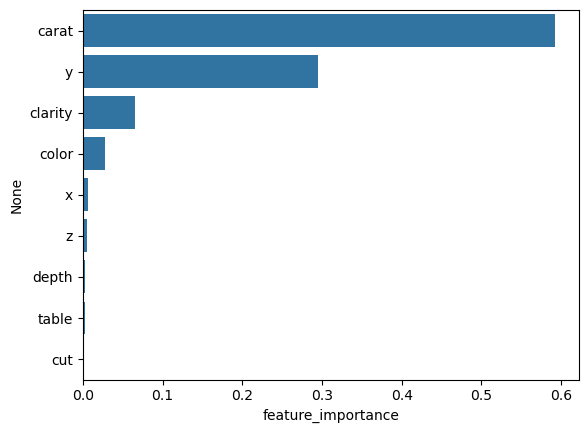

In [232]:
importance_df = importance_df.sort_values(by=['feature_importance'], ascending=False)
sns.barplot(
    importance_df,
    y=importance_df.index,
    x=importance_df.feature_importance,
)